<a href="https://colab.research.google.com/github/kanishk16/routetoMIDASS/blob/master/CV_Problem/CV_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mount the drive for saving directly to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-04-07 10:13:31--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-04-07 10:13:31 (28.0 MB/s) - ‘helper.py’ saved [2813/2813]



In [114]:
import PIL
print(PIL.PILLOW_VERSION)
# we need pillow version of 5.3.0
# we will uninstall the older version first
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==4.1.1
# import the new one
import PIL
print(PIL.PILLOW_VERSION)

4.1.1
Uninstalling Pillow-4.1.1:
  Successfully uninstalled Pillow-4.1.1
    100% |████████████████████████████████| 5.7MB 6.6MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


4.1.1


In [0]:
# Imports 
import numpy as np
import torch
import pickle
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

### Defining the directories n Loading the data the from .pkl file

In [0]:
data_dir = '/content/'
train_lab_dir = data_dir + 'train_label.pkl'
train_dir = data_dir + 'train_image.pkl'
test_dir = data_dir + 'test_image.pkl'

In [0]:
!realpath train_data_set
print(train_dir)

/content/train_data_set
/content/train_image.pkl


In [0]:
!rmdir train_data_set

In [6]:
# load images from pkl file

with open(train_dir,"rb") as f:
  train_data = pickle.load(f)
print(type(train_data))
print(len(train_data[0]))
print(len(train_data))

<class 'list'>
784
8000


In [7]:
# load images from pkl file

with open(test_dir,"rb") as f:
  test_data = pickle.load(f)
print(type(test_data))
print(len(test_data[0]))
print(len(test_data))

<class 'list'>
784
2000


In [20]:
with open(train_lab_dir,"rb") as f:
  train_lab = pickle.load(f)
  print(train_lab)
print(type(train_lab))
print(len(train_lab))
print(set(train_lab))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Probably these are a set of grey-scale images (28x28x1) but the possibility of CMYK (14x14x4) cannot be ruled out completely..

### Visualizing the Images!!

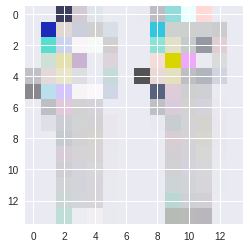

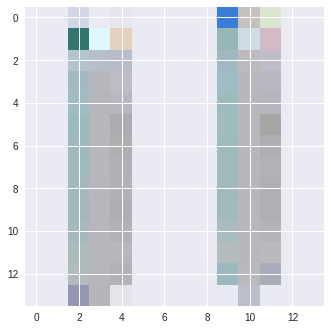

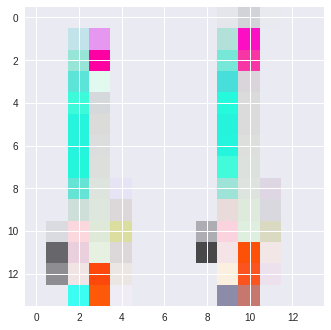

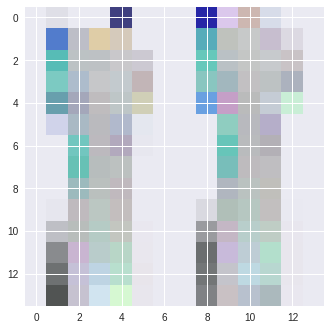

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4))
for ii in range(4):
  vtrain_data = np.array(train_data[ii]).reshape(14,14,4)
  plt.imshow(vtrain_data)
  plt.show()

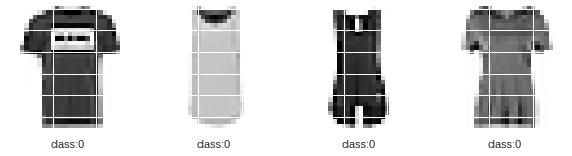

In [84]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  vtrain_data = np.array(train_data[ii]).reshape(28,28)
  ax = axes[ii]
  ax.imshow(vtrain_data)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_xlabel("class:" + str(train_lab[ii]))
  #plt.show()

####Convert data from type < LIST > to < NDARRAY>

In [118]:
itrain_data = np.array(train_data)
itrain_data.resize(itrain_data.shape[0],28,28,1)  
print(itrain_data.shape)
  
itest_data = np.array(test_data)
itest_data.resize(itest_data.shape[0],28,28,1) 
  #itrain_lab = np.array(train_lab[iii]).reshape(28,28)
print(itest_data.shape)

itrain_lab = np.array(train_lab)
print(itrain_lab.shape)

(8000, 28, 28, 1)
(2000, 28, 28, 1)
(8000,)


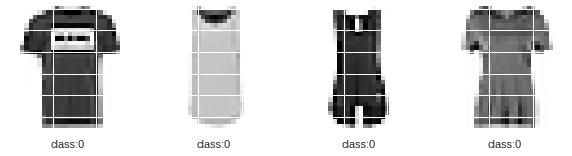

In [107]:
#Confirmimg NO CHANGES while RESHAPING/RESIZING
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  vtrain_data = itrain_data[ii,:,:].reshape(28,28)
  ax = axes[ii]
  ax.imshow(vtrain_data)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_xlabel("class:" + str(train_lab[ii]))
  #plt.show()

In [0]:
###
print(train_data[0])
print(itrain_data[0,:,:,:])

#### Splitting the TRAINING SET into TRAIN and VALIDATION

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(itrain_data/255, itrain_lab, test_size=0.20, shuffle=True)

## DATA AUGMENTATION 

Applied only for the training dataset to Normalize the images as well as to avoid Overfitting

Though the basic transforms are defined for both train_set and test_set to bring uniformity to all the images

In [0]:
# Define transforms for the training and testing sets
train_transforms =  transforms.Compose([transforms.ToPILImage(),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])


In [0]:
valid_transforms =  transforms.Compose([transforms.ToPILImage(),
                              #transforms.Resize(225),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485, 0.456, 0.406], 
                                                   [0.229, 0.224, 0.225])])


### Defining the dataset and dataloaders

In [0]:
train_x = torch.stack([train_transforms(torch.Tensor(i)) for i in x_train]) 
train_y = torch.stack([torch.Tensor(i) for i in y_train.reshape(-1,1)])

train_dataset = torch.utils.data.TensorDataset(train_x,train_y)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [0]:
valid_x = torch.stack([valid_transforms(torch.Tensor(i)) for i in x_valid]) 
valid_y = torch.stack([torch.Tensor(i) for i in y_valid.reshape(-1,1)])

valid_dataset = torch.utils.data.TensorDataset(valid_x,valid_y)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = 32, shuffle=True)